# Veri Analizi Örnekleri

# 14.1 1.USA.gov Verileri Bitly'den
    2011'de, URL kısaltma hizmeti Bitly, .gov veya .mil ile biten bağlantıları kısaltan kullanıcılardan toplanan anonim verilerin beslemesini sağlamak için ABD hükümeti web sitesi USA.gov ile ortaklık kurdu. 2011 yılında, canlı bir beslemenin yanı sıra saatlik anlık görüntüler indirilebilir metin dosyaları olarak mevcuttu. Bu hizmet, bu yazının yazıldığı sırada (2017) kapatılmıştır. Saatlik anlık görüntülerde, her dosyadaki her satır, JavaScript Nesne Gösterimi anlamına gelen JSON olarak bilinen ortak bir web verileri biçimi içerir. Örneğin, bir dosyanın sadece ilk satırını okursak şuna benzer bir şey görebiliriz:

In [8]:
path = 'datasets/bitly_usagov/example.txt'

In [9]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [10]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

In [11]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

# Python'da Saat Dilimlerini Sayma
    Veri kümesinde (tz alanı) en sık meydana gelen saat dilimlerini bulmakla ilgilendiğimizi varsayalım. Bunu yapmanın birçok yolu var. Öncelikle, bir liste anlayışı kullanarak tekrar saat dilimlerinin bir listesini çıkaralım:

In [12]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

    Tüm kayıtların bir saat dilimi alanına sahip olmadığı ortaya çıktı. Listenin anlaşılmasının sonuna "tz" kaydı ekleyebileceğimiz için, bunu idare etmek kolaydır.

In [13]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [14]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

    Sadece ilk 10 zaman dilimine baktığımızda, bazılarının bilinmediğini görüyoruz (boş dize). Şimdi, saat dilimine göre sayımlar üretmek için iki yaklaşım varıdr: daha zor yol (sadece Python standart kitaplığını kullanarak) ve daha kolay yol (pandas kullanarak).

In [15]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
                counts[x] = 1
        return counts

    Python standart kitaplığındaki daha gelişmiş araçları kullanarak aynı şeyi daha kısaca yazabilirsiniz.

In [16]:
from collections import defaultdict

In [17]:
def get_counts2(sequence):
    counts = defaultdict(int) # değerler 0'a başlayacak
    for x in sequence:
        counts[x] += 1
    return counts

    Bu mantığı, daha yeniden kullanılabilir hale getirmek için bir işleve koydum. Bunu saat dilimlerinde kullanmak için zaman dilimleri listesini geçirmeniz yeterlidir.

In [18]:
counts = get_counts(time_zones)

In [19]:
counts['America/New_York']

1

In [20]:
len(time_zones)

3440

    En iyi 10 saat dilimini ve sayılarını istersek, biraz sözlük akrobasi yapabiliriz.

In [21]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [22]:
top_counts(counts)

[(1, 'America/New_York')]

    Python standart kitaplığında arama yaparsanız, collections.Counter sınıfını bulabilirsiniz, bu da bu görevi çok daha kolay hale getirir.

In [23]:
from collections import Counter

In [24]:
counts = Counter(time_zones)

In [25]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

# Pandas Saat Dilimlerini Sayma
    Orijinal kayıt kümesinden bir DataFrame oluşturmak, kayıtların listesini pandas'a geçirmek kadar kolaydır.

In [26]:
import pandas as pd

In [27]:
frame = pd.DataFrame(records)

In [28]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [29]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

    Çerçeve için gösterilen çıktı, büyük DataFrame nesneleri için gösterilen özet görünümdür. Ardından Series için value_counts yöntemini kullanabiliriz.

In [30]:
tz_counts = frame['tz'].value_counts()

In [31]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

    Bu verileri matplotlib kullanarak görselleştirebiliriz. Kayıtlardaki bilinmeyen ve eksik saat dilimi verileri için bir yedek değer doldurmak için biraz parçalama yapabilirsiniz. Eksik değerleri fillna yöntemiyle değiştiriyoruz ve boş dizeler için boolean dizi indekslemesini kullanıyoruz.

In [32]:
clean_tz = frame['tz'].fillna('Missing')

In [33]:
clean_tz[clean_tz == ''] = 'Unknown'

In [34]:
tz_counts = clean_tz.value_counts()

In [35]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

    Bu noktada, seaborn paketini yatay bir çubuk grafiği yapmak için kullanabiliriz (sonuç görselleştirme için Şekil 14-1).

In [36]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [37]:
import seaborn as sns

In [38]:
subset = tz_counts[:10]

<AxesSubplot:>

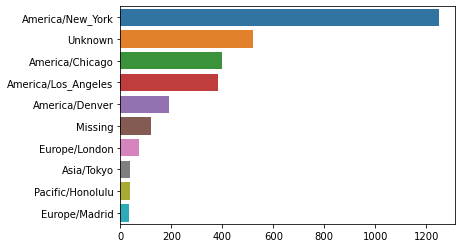

In [39]:
sns.barplot(y=subset.index, x=subset.values)

    A,alan, URL kısaltmasını gerçekleştirmek için kullanılan tarayıcı, cihaz veya uygulama hakkında bilgi içerir.

In [40]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [41]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [42]:
frame['a'][51][:50] # uzun çizgi

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

    Bu "aracı" dizelerindeki tüm ilginç bilgileri ayrıştırmak göz korkutucu bir görev gibi görünebilir. Olası bir strateji, dizedeki ilk belirteci ayırmak (kabaca tarayıcı kapasitesine karşılık gelir) ve kullanıcı davranışının başka bir özetini yapmaktır.

In [43]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [44]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [45]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

    Şimdi, en iyi saat dilimlerini Windows ve Windows olmayan kullanıcılara ayırmak istediğinizi varsayalım. Basitleştirme olarak, ajan dizesinde 'Windows' dizesi varsa kullanıcının Windows'ta olduğunu varsayalım. Bazı aracılar eksik olduğundan, bunları verilerden çıkaracağız.

In [46]:
cframe = frame[frame.a.notnull()]

    Daha sonra her satırın Windows olup olmadığı için bir değer hesaplamak istiyoruz.

In [47]:
import numpy as np
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                        'Windows', 'Not Windows')

/Users/veyseldogan/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

    Ardından, verileri saat dilimi sütununa ve bu yeni işletim sistemleri listesine göre gruplayabilirsiniz.

In [49]:
by_tz_os = cframe.groupby(['tz', 'os'])

    Değer_sayısı işlevine benzer şekilde grup sayıları boyut ile hesaplanabilir. Bu sonuç daha sonra unstack ile bir tabloya dönüştürülür.

In [50]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [51]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


    Son olarak, genel olarak en iyi saat dilimlerini seçelim. Bunu yapmak için, agg_counts içindeki satır sayımlarından dolaylı bir dizin dizisi oluşturuyoruz.

In [52]:
indexer = agg_counts.sum(1).argsort()

In [53]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

    Sıraları bu sırayla seçmek için take komutunu kullanıyorum, ardından son 10 satırı dilimlere ayırıyorum (en büyük değerler).

In [54]:
count_subset = agg_counts.take(indexer[-10:])

In [55]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


    Pandas, aynı şeyi yapan nlargest adlı bir kolaylık yöntemine sahiptir.

In [56]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

    Daha sonra, önceki kod bloğunda gösterildiği gibi, bu bir çubuk grafikte çizilebilir; Seaborn’un barplot işlevine ek bir argüman ileterek bunu yığılmış bir çubuk grafiği yapacağız (Şekil 14-2).

In [57]:
count_subset = count_subset.stack()

In [58]:
count_subset.name = 'total'

In [59]:
count_subset = count_subset.reset_index()

In [60]:
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

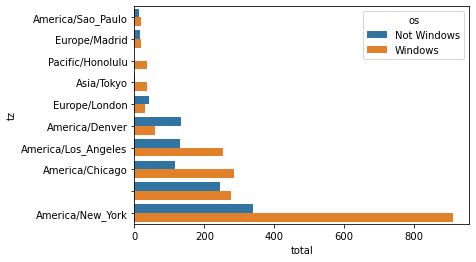

In [61]:
sns.barplot(x='total', y='tz', hue='os',  data=count_subset)

    Grafik, daha küçük gruplardaki Windows kullanıcılarının göreli yüzdesini görmeyi kolaylaştırmaz, bu yüzden grup yüzdelerini 1'e toplamı normalleştirelim.

In [62]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group
results = count_subset.groupby('tz').apply(norm_total)

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

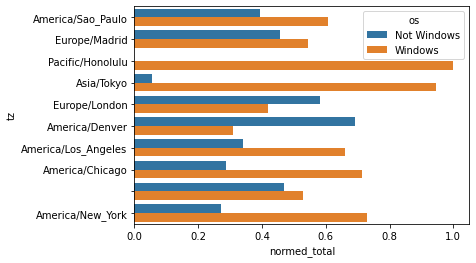

In [63]:
sns.barplot(x='normed_total', y='tz', hue='os',  data=results)

    Groupby ile trans form yöntemini kullanarak normalleştirilmiş toplamı daha verimli bir şekilde hesaplayabilirdik.

In [64]:
g = count_subset.groupby('tz')

In [65]:
results2 = count_subset.total / g.total.transform('sum')

# 14.2 MovieLens 1M Veri Kümesi
    GroupLens Research, 1990'ların sonunda ve 2000'lerin başında MovieLens kullanıcılarından toplanan bir dizi film derecelendirme verisi sunar. Veriler, kullanıcılar hakkında film derecelendirmeleri, film meta verileri (türler ve yıl) ve demografik veriler (yaş, posta kodu, cinsiyet kimliği ve meslek) sağlar. Bu tür veriler, genellikle makine öğrenimi algoritmalarına dayalı öneri sistemlerinin geliştirilmesiyle ilgilenir. Bu kitapta makine öğrenimi tekniklerini ayrıntılı olarak incelemesek de, size bunun gibi veri kümelerini tam olarak ihtiyacınız olan biçime nasıl böleceğinizi göreceğiz. MovieLens 1M veri kümesi, 4.000 filmdeki 6.000 kullanıcıdan toplanan 1 milyon derecelendirme içerir. Üç tabloya yayılmıştır: derecelendirmeler, kullanıcı bilgileri ve film bilgileri. Verileri ZIP dosyasından çıkardıktan sonra, her tabloyu pandas.read_table kullanarak bir pandas DataFrame nesnesine yükleyebiliriz.

In [66]:
import pandas as pd

In [67]:
pd.options.display.max_rows = 10

In [68]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::',
                          header=None, names=unames)

/Users/veyseldogan/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/io/parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [69]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::',
                            header=None, names=rnames)

In [70]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)

    Python’un dilim sözdizimi ile her bir DataFrame’in ilk birkaç satırına bakarak her şeyin başarılı olduğunu doğrulayabilirsiniz.

In [71]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [72]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [73]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [74]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


    Yaşların ve mesleklerin, veri kümesinin README dosyasında açıklanan grupları gösteren tamsayılar olarak kodlandığını unutmayın. Üç tabloya dağılmış verileri analiz etmek basit bir iş değildir; örneğin, belirli bir film için cinsiyet ve yaşa göre ortalama derecelendirmeleri hesaplamak istediğinizi varsayalım. Göreceğiniz gibi, tek bir tabloda birleştirilen tüm verilerle bunu yapmak çok daha kolaydır. Pandas birleştirme işlevini kullanarak, önce kullanıcı oylarını kullanıcılarla birleştiriyoruz ve ardından bu sonucu film verileriyle birleştiriyoruz. Pandas, örtüşen adlara göre hangi sütunların birleştirme (veya birleştirme) anahtarları olarak kullanılacağını belirler.

In [75]:
data = pd.merge(pd.merge(ratings, users), movies)

In [76]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [77]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

    Cinsiyete göre gruplandırılmış her film için ortalama film derecelendirmeleri almak için pivot_table yöntemini kullanabiliriz.

In [78]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

In [79]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


    Bu, satır etiketleri ("dizin") olarak film başlıkları ve sütun etiketleri olarak cinsiyet içeren ortalama derecelendirmeleri içeren başka bir DataFrame üretti. Önce en az 250 derecelendirme (tamamen rastgele bir sayı) alan filmleri filtreliyorum; Bunu yapmak için, verileri başlığa göre gruplandırıyorum ve her başlık için bir dizi grup boyutu elde etmek için boyut () kullanıyorum:

In [80]:
ratings_by_title = data.groupby('title').size()

In [81]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [82]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [83]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

    En az 250 derecelendirme alan başlıkların dizini daha sonra mean_ratings'den satır seçmek için kullanılabilir.

In [84]:
mean_ratings = mean_ratings.loc[active_titles]

In [85]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


    Kadın izleyiciler arasında en çok izlenen filmleri görmek için F sütununa göre azalan sırada sıralayabiliriz.

In [86]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [87]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


# Derecelendirme Anlaşmazlığının Ölçülmesi
    Erkek ve kadın izleyicileri en çok bölen filmleri bulmak istediğinizi varsayalım. Bunun bir yolu, ortalamalardaki farklılığı içeren ortalama puanlara bir sütun eklemek ve ardından buna göre sıralamaktır.

In [88]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

    Kadınlar tarafından hangilerinin tercih edildiğini görebilmemiz için 'farklı'ya göre sıralama, reyting farkı en yüksek olan filmleri verir.

In [89]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [90]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


    Sıraların sırasını tersine çevirip yine ilk 10 sırayı bölerek, erkeklerin tercih ettiği ve kadınların pek de beğenmediği filmleri elde ederiz.

In [91]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


    Bunun yerine, cinsiyet kimliğinden bağımsız olarak izleyiciler arasında en fazla anlaşmazlığı ortaya çıkaran filmleri istediğinizi varsayalım. Uyuşmazlık, derecelendirmelerin varyansı veya standart sapması ile ölçülebilir.

In [92]:
rating_std_by_title = data.groupby('title')['rating'].std()# Başlığa göre gruplandırılmış derecelendirmenin standart sapması

In [93]:
rating_std_by_title = rating_std_by_title.loc[active_titles]# Active_titles'a göre filtreleyin

In [94]:
rating_std_by_title.sort_values(ascending=False)[:10]# Azalan sırayla değere göre Seri Sıralama

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

    Film türlerinin dikey çizgi ile ayrılmış (|) dizge olarak verildiğini fark etmiş olabilirsiniz. Türe göre bazı analizler yapmak isterseniz, tür bilgisini daha kullanışlı bir forma dönüştürmek için daha fazla çalışma yapmanız gerekecektir.

# 14.3 ABD Bebek İsimleri 1880–2010
    Amerika Birleşik Devletleri Sosyal Güvenlik İdaresi (SSA), 1880'den günümüze kadar bebek isimlerinin sıklığı ile ilgili verileri kullanıma sundu. Birkaç popüler R paketinin yazarı olan Hadley Wickham, R'deki veri manipülasyonunu göstermek için bu veri setini sık sık kullanmıştır. Bu veri setini yüklemek için bazı veri tartışmaları yapmamız gerekir, ancak bunu yaptığımızda aşağıdaki gibi görünen bir DataFrame'e sahip olacağız. bu:

    names.head(10)
               name sex  births  year
        0       Mary   F    7065  1880
        1       Anna   F    2604  1880
        2       Emma   F    2003  1880
        3  Elizabeth   F    1939  1880
        4     Minnie   F    1746  1880
        5   Margaret   F    1578  1880
        6        Ida   F    1472  1880
        7      Alice   F    1414  1880
        8     Bertha   F    1320  1880
        9      Sarah   F    1288  1880

    Veri kümesiyle yapmak isteyebileceğiniz birçok şey var:
    • Belirli bir ad (kendi adınız veya başka bir ad) verilen bebeklerin oranını zaman içinde görselleştirin
    • Bir adın göreceli sırasını belirleyin
    • Her yıl en popüler isimleri veya popülerliği en çok artan veya azalan isimleri belirleyin
    • İsimlerdeki eğilimleri analiz edin: ünlüler, ünsüzler, uzunluk, genel çeşitlilik, yazım değişiklikleri, ilk ve son harfler
    • Dış eğilim kaynaklarını analiz edin: İncil isimleri, ünlüler, demografik değişiklikler

In [95]:
!head -n 10 datasets/babynames/yob1880.txt

    Bu zaten virgülle ayrılmış güzel bir biçimde olduğundan, pandas.read_csv ile Veri Çerçevesine yüklenebilir.

In [96]:
import pandas as pd

In [97]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])

In [98]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


    Bu dosyalar sadece her yıl en az beş kez meydana gelen isimleri içerir, bu yüzden basitlik uğruna, o yıldaki toplam doğum sayısı olarak cinsiyete göre doğumların toplamını kullanabiliriz.

In [99]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

    Veri kümesi yıllara göre dosyalara bölündüğünden, yapılacak ilk şeylerden biri, tüm verileri tek bir DataFrame'de toplamak ve ayrıca bir yıl alanı eklemektir. Bunu pandas.concat kullanarak yapabilirsiniz.

In [100]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
    # Her şeyi tek bir DataFrame'de birleştirin
    
names = pd.concat(pieces, ignore_index=True)

    Burada dikkat edilmesi gereken birkaç nokta var. İlk olarak, concat'in Veri Çerçevesi nesnelerini varsayılan olarak satır şeklinde birbirine yapıştırdığını unutmayın. İkinci olarak, ignore_index = True olarak geçmelisiniz çünkü read_csv'den döndürülen orijinal satır numaralarını korumakla ilgilenmiyoruz. Şimdi tüm isim verilerini içeren çok büyük bir DataFrame'imiz var.

In [101]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


    Elimizdeki bu verilerle, groupby veya pivot_table kullanarak verileri yıl ve cinsiyet düzeyinde toplamaya başlayabiliriz (Şekil 14-4).

In [102]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)

In [103]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

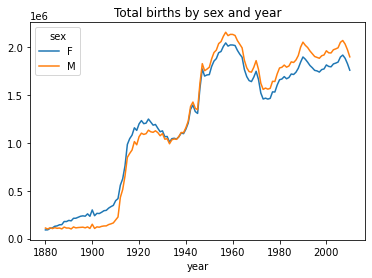

In [104]:
total_births.plot(title='Total births by sex and year')

    Daha sonra, toplam doğum sayısına göre her adın verildiği bebeklerin oranını içeren bir sütun desteği ekleyelim. 0,02'lik bir prop değeri, her 100 bebekten 2'sine belirli bir ad verildiğini gösterir. Bu nedenle, verileri yıla ve cinsiyete göre gruplandırıyoruz ve ardından her gruba yeni sütunu ekliyoruz.

In [105]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

    Elde edilen eksiksiz veri kümesi artık aşağıdaki sütunlara sahiptir:

In [106]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


    Bunun gibi bir grup işlemi gerçekleştirirken, tüm gruplar içinde destek sütununun toplamının 1 olduğunu doğrulamak gibi bir kontrol yapmak genellikle değerlidir.

In [107]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

    Şimdi bu yapıldığına göre, daha fazla analizi kolaylaştırmak için verilerin bir alt kümesini çıkaracağız, her cinsiyet / yıl kombinasyonu için ilk 1.000 isim. Bu yine başka bir grup işlemidir.

In [108]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Grup dizinini bırakın, gerekli değildir
top1000.reset_index(inplace=True, drop=True)

    Bir kendin yap yaklaşımını tercih ediyorsanız, bunun yerine şunu deneyin:

In [109]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
    top1000 = pd.concat(pieces, ignore_index=True)

    Ortaya çıkan veri kümesi artık biraz daha küçük.

In [110]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


    Bu İlk 1.000 veri kümesini, verilerle ilgili aşağıdaki araştırmalarda kullanacağız.

# Adlandırma Trendlerini Analiz Etme
    Elimizdeki tam veri kümesi ve İlk 1.000 veri kümesiyle, çeşitli adlandırma eğilimlerini analiz etmeye başlayabiliriz. İlk 1.000 ismi erkek ve kız bölümlerine ayırmak ilk önce kolaydır.

In [111]:
boys = top1000[top1000.sex == 'M']

In [112]:
girls = top1000[top1000.sex == 'F']

    Her yıl için Johns veya Mary sayısı gibi basit zaman serileri çizilebilir, ancak daha kullanışlı olması için biraz parçalama gerektirir. Yıla ve isme göre toplam doğum sayısının bir pivot tablosunu oluşturalım.

In [113]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

    Şimdi, bu, DataFrame'in çizim yöntemiyle bir avuç ad için çizilebilir (Şekil 14-5 sonucu gösterir).

In [114]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [115]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

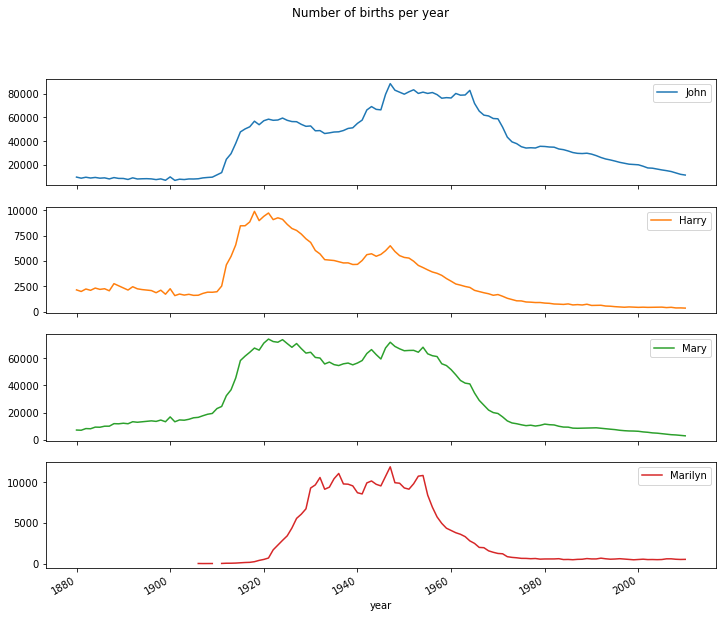

In [116]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

    Buna baktığınızda, bu isimlerin Amerikan halkının gözünden düştüğü sonucuna varabilirsiniz. Ancak hikaye, bir sonraki bölümde inceleneceği gibi aslında bundan daha karmaşık.

#    Adlandırma çeşitliliğindeki artışı ölçmek
    Konuların azalmasının bir açıklaması, daha az sayıda ebeveynin çocukları için ortak isimler seçmesidir. Bu hipotez, verilerde araştırılabilir ve doğrulanabilir. Bir ölçü, yıllara ve cinsiyete göre bir araya getirip grafiğini çizdiğim ilk 1.000 en popüler ismin temsil ettiği doğumların oranıdır (Şekil 14-6 sonuçtaki durumu göstermektedir).

In [120]:
table = top1000.pivot_table('prop', index='year',
                           columns='sex', aggfunc=sum)

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

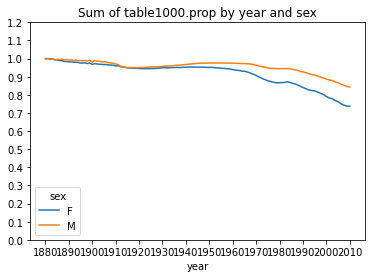

In [121]:
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10)
          )

    Aslında, isim çeşitliliğinin arttığını görebilirsiniz (ilk 1.000'deki toplam oran azalıyor). Bir başka ilginç ölçü de doğumların ilk% 50'sinde popülerlik sırasına göre en yüksekten en düşüğe doğru alınan farklı adların sayısıdır. Bu sayıyı hesaplamak biraz daha zor. 2010'daki erkek isimlerini ele alalım:

In [122]:
df = boys[boys.year == 2010]

In [123]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


    Pervaneyi azalan sırada sıraladıktan sonra,% 50'ye ulaşmak için en popüler isimlerden kaç tanesinin gerektiğini bilmek istiyoruz. Bunu yapmak için bir for döngüsü yazabilirsiniz, ancak vektörleştirilmiş bir NumPy yöntemi biraz daha zekice. Pervanenin kümülatif toplamını, toplamını almak ve ardından aranan yöntemi çağırmak, sıralı düzende tutmak için 0,5'in eklenmesi gereken kümülatif toplamdaki konumu döndürür.

In [125]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [127]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [128]:
prop_cumsum.values.searchsorted(0.5)

116

    Diziler sıfır dizinli olduğundan, bu sonuca 1 eklemek size 117 sonucunu verir. Buna karşılık, 1900'de bu sayı çok daha küçüktü.

In [129]:
df = boys[boys.year == 1900]

In [130]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [131]:
in1900.values.searchsorted(0.5) + 1

25

    Artık bu işlemi her yıl / cinsiyet kombinasyonuna uygulayabilir, bu alanlara göre gruplandırabilir ve her grup için sayımı döndüren bir işlev uygulayabilirsiniz.

In [137]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

    Sonuçta ortaya çıkan bu DataFrame çeşitliliği artık her cinsiyet için bir tane olmak üzere yıllara göre indekslenmiş iki zaman serisine sahiptir. Bu, IPython'da incelenebilir ve daha önce olduğu gibi çizilebilir (Şekil 14-7).

In [138]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

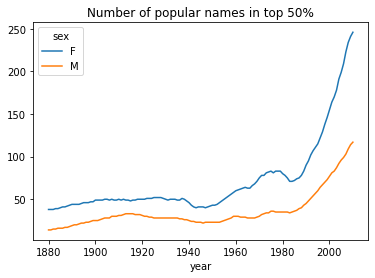

In [139]:
diversity.plot(title="Number of popular names in top 50%")

    Gördüğünüz gibi, kız isimleri her zaman erkek isimlerinden daha çeşitli olmuştur ve ancak zamanla daha da artmıştır. Alternatif yazımların artması gibi, çeşitliliği tam olarak neyin yönlendirdiğine dair daha fazla analiz okuyucuya bırakılmıştır.

# "last letter" devrimi
    2007'de bebek ismi araştırmacısı Laura Wattenberg, internet sitesinde erkek isimlerinin son harflere göre dağılımının son 100 yılda önemli ölçüde değiştiğine dikkat çekti. Bunu görmek için, ilk olarak tam veri kümesindeki tüm doğumları yıla, cinsiyete ve son mektuba göre topluyoruz.

In [142]:
# isim sütunundaki son harfi çıkar
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                              columns=['sex', 'year'], aggfunc=sum)

    Ardından, geçmişi kapsayan üç temsili yılı seçip ilk birkaç satırı yazdırıyoruz.

In [143]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [144]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

    Daha sonra, her harfle biten her cinsiyet için toplam doğum oranını içeren yeni bir tablo hesaplamak için tabloyu toplam doğumlara göre normalleştirin.

In [145]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [146]:
letter_prop = subtable / subtable.sum()

In [147]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

    Artık elimizdeki harf oranlarıyla, her cinsiyet için yıllara göre ayrılmış çubuk grafikleri yapabiliriz (Şekil 14-8).

In [148]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

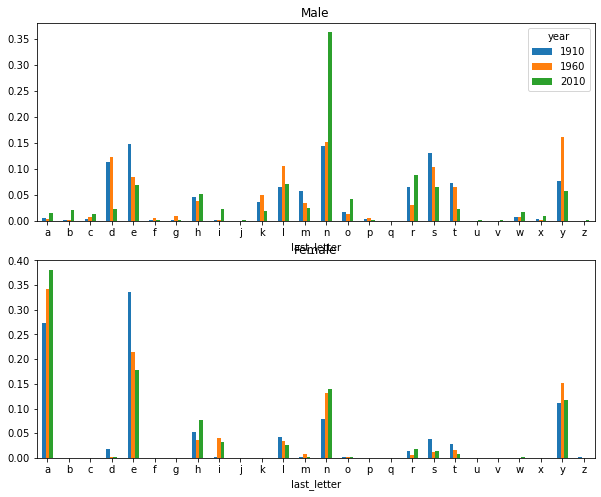

In [151]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                          legend=False)

    Gördüğünüz gibi, n ile biten erkek isimleri 1960'lardan beri önemli bir büyüme yaşamıştır. Daha önce oluşturulan tam tabloya geri dönersek, yine yıllara ve cinsiyete göre normalleştiriyoruz ve erkek isimleri için bir harf alt kümesi seçiyoruz, sonunda her bir sütunu bir zaman serisi yapmak için yer değiştiriyoruz.

In [152]:
letter_prop = table / table.sum()

In [153]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [154]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


    Elimizdeki bu DataFrame zaman serisiyle, çizim yöntemiyle tekrar zaman içindeki trendlerin bir grafiğini oluşturabiliriz (Şekil 14-9).

<AxesSubplot:xlabel='year'>

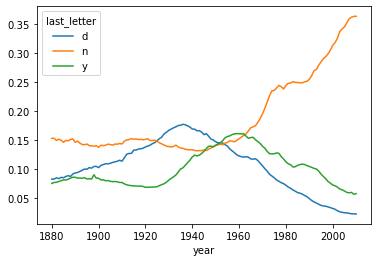

In [155]:
dny_ts.plot()

# Kız isimleri haline gelen erkek isimleri (ve tersi)
    Bir başka eğlenceli trend ise, örnekteki bir cinsiyetten daha popüler olan, ancak günümüzde “cinsiyet değiştiren” erkek isimlerine bakmaktır. Bir örnek Lesley veya Leslie adıdır. İlk 1000 DataFrame'e geri dönersek, "lesl" ile başlayan veri kümesinde meydana gelen adların bir listesini hesaplayalım.

In [156]:
all_names = pd.Series(top1000.name.unique())

In [157]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [158]:
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

    Oradan, göreceli sıklıkları görmek için isme göre gruplandırılan isimleri ve toplam doğumları filtreleyebiliriz.

In [159]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [160]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

    Sonra, cinsiyete ve yıla göre toplayalım ve yıl içinde normale dönelim.

In [161]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')

In [162]:
table = table.div(table.sum(1), axis=0)

In [163]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


    Son olarak, zaman içinde cinsiyete göre dağılımın bir grafiğini çıkarmak artık mümkün.

<AxesSubplot:xlabel='year'>

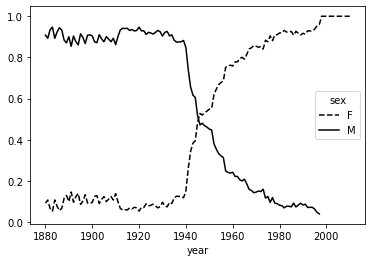

In [164]:
table.plot(style={'M': 'k-', 'F': 'k--'})

# 14.4 USDA Gıda Veritabanı
    ABD Tarım Bakanlığı, gıda besin maddesi bilgilerinin bir veri tabanını kullanıma sunuyor. Programcı Ashley Williams, bu veritabanının JSON formatında bir versiyonunu kullanıma sundu. Kayıtlar şuna benzer:

    {
        "id": 21441,
        "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY,
        Wing, meat and skin with breading",
        "tags": ["KFC"],
        "manufacturer": "Kentucky Fried Chicken",
        "group": "Fast Foods",
        "portions": [ 
            {
                "amount": 1,
                "unit": "wing, with skin",
                "grams": 68.0
                },
            ...
            ],
        "nutrients": [
            {
                "value": 20.8,
                "units": "g",
                "description": "Protein",
                "group": "Composition"
                },
            ...
            ]
        }

    Her yiyeceğin, iki besin listesi ve porsiyon boyutları ile birlikte bir dizi tanımlayıcı özelliği vardır. Bu formdaki veriler özellikle analiz için uygun değildir, bu nedenle verileri daha iyi bir forma dönüştürmek için biraz çalışmak gerekir.
    Verileri bağlantıdan indirip çıkardıktan sonra, seçtiğiniz herhangi bir JSON kitaplığıyla Python'a yükleyebilirsiniz. Yerleşik Python json modülünü kullanacağız.

In [192]:
import json

In [193]:
db = json.load(open('datasets/usda_food/database.json'))

In [194]:
len(db)

6636

    Db'deki her giriş, tek bir gıda için tüm verileri içeren bir diktedir. 'Besinler' alanı, her besin için bir tane olacak şekilde bir zorunluluk listesidir.

In [195]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [196]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [197]:
nutrients = pd.DataFrame(db[0]['nutrients'])

In [198]:
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


    Bir dicts listesini DataFrame'e dönüştürürken, ayıklanacak alanların bir listesini belirleyebiliriz. Yiyecek adlarını, grubunu, kimliğini ve üreticisini alacağız.

In [199]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [200]:
info = pd.DataFrame(db, columns=info_keys)

In [201]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [202]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


    Value_counts ile gıda gruplarının dağılımını görebilirsiniz.

In [203]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

    Şimdi, tüm besin verileri üzerinde bazı analizler yapmak için en kolayı, her bir yiyeceğin besinlerini tek bir büyük masada toplamaktır. Bunu yapmak için birkaç adım atmamız gerekiyor. İlk olarak, her besin besinleri listesini bir DataFrame'e dönüştüreceğim, yiyecek kimliği için bir sütun ekleyeceğim ve DataFrame'i bir listeye ekleyeceğim. Ardından, bunlar concat ile birlikte birleştirilebilir.
    Her şey yolunda giderse, besinler şöyle görünmelidir:

In [204]:
nutrients

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


    Bu DataFrame'de yinelenen öğeler var, bu yüzden onları siliyoruz.

In [205]:
nutrients.duplicated().sum() # kopya sayısı

108

In [206]:
nutrients = nutrients.drop_duplicates()

    Her iki DataFrame nesnesinde de "grup" ve "açıklama" olduğundan, netlik sağlamak için yeniden adlandırabiliriz.

In [207]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}

In [208]:
info = info.rename(columns=col_mapping, copy=False)

In [209]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [210]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}

In [211]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [212]:
nutrients

,value,units,nutrient,nutgroup
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
49,1.618,g,Aspartic acid,Amino Acids
50,6.160,g,Glutamic acid,Amino Acids
51,0.439,g,Glycine,Amino Acids
52,2.838,g,Proline,Amino Acids


    Tüm bunları yaptıktan sonra, bilgileri besinlerle birleştirmeye hazırız.

ndata = pd.merge(nutrients, info, on='id', how='outer')

ndata.info()

ndata.iloc[30000]

    Artık gıda grubu ve besin türüne göre medyan değerlerin bir grafiğini oluşturabiliriz.

result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

result['Zinc, Zn'].sort_values().plot(kind='barh')

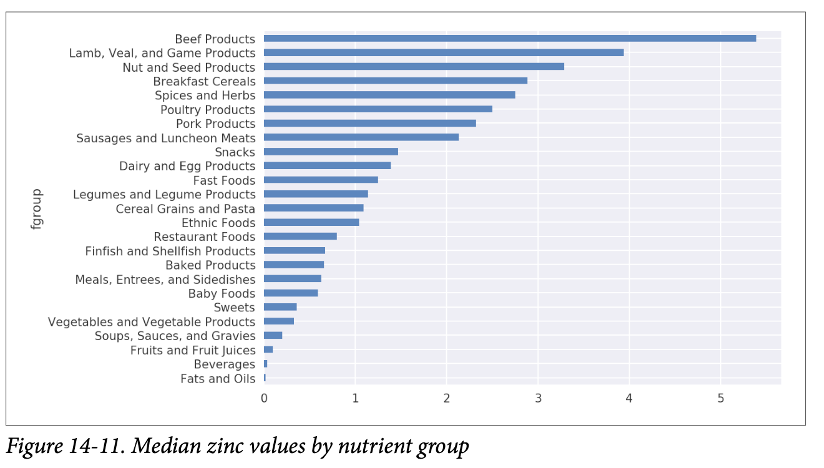

In [227]:
from IPython.display import Image
Image(filename='img/Picture85.png')

    Her besinde hangi yiyeceğin en yoğun olduğunu bulabilirsiniz.

    by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

    get_maximum = lambda x: x.loc[x.value.idxmax()]
    get_minimum = lambda x: x.loc[x.value.idxmin()]

    max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

    # yemeği biraz küçült
    max_foods.food = max_foods.food.str[:50]

    Sonuçta elde edilen DataFrame, kitapta görüntülenemeyecek kadar büyük; işte sadece 'Amino Asitler' besin grubu.

    max_foods.loc['Amino Acids']['food']

# 14.5 2012 Federal Seçim Komisyonu Veritabanı
    ABD Federal Seçim Komisyonu, siyasi kampanyalara katkılarla ilgili verileri yayınlar. Buna katkıda bulunanların isimleri, mesleği ve işveren, adres ve katkı miktarı dahildir. İlginç bir veri seti, 2012 ABD başkanlık seçimlerinden. Haziran 2012'de indirdiğim veri kümesinin bir sürümü, pan das.read_csv ile yüklenebilen 150 megabaytlık bir CSV dosyası P00000001-ALL.csv'dir (kitabın veri havuzuna bakın).

In [4]:
import pandas as pd
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')

/Users/veyseldogan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

    DataFrame'deki örnek bir kayıt şuna benzer:

In [6]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

    Verilerde herhangi bir siyasi parti bağlantısı olmadığını görebilirsiniz, bu nedenle bunu eklemek faydalı olacaktır. Benzersiz olanı kullanarak tüm benzersiz siyasi adayların bir listesini alabilirsiniz.

In [8]:
unique_cands = fec.cand_nm.unique()

In [9]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [10]:
unique_cands[2]

'Obama, Barack'

In [11]:
parties = {'Bachmann, Michelle': 'Republican',
               'Cain, Herman': 'Republican',
               'Gingrich, Newt': 'Republican',
               'Huntsman, Jon': 'Republican',
               'Johnson, Gary Earl': 'Republican',
               'McCotter, Thaddeus G': 'Republican',
               'Obama, Barack': 'Democrat',
               'Paul, Ron': 'Republican',
               'Pawlenty, Timothy': 'Republican',
               'Perry, Rick': 'Republican',
               "Roemer, Charles E. 'Buddy' III": 'Republican',
               'Romney, Mitt': 'Republican',
               'Santorum, Rick': 'Republican'}

    Şimdi, bu eşlemeyi ve Seri nesnelerdeki harita yöntemini kullanarak, aday isimlerinden bir dizi siyasi parti hesaplayabilirsiniz.

In [12]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [13]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [14]:
# Sütun olarak ekleyin
fec['party'] = fec.cand_nm.map(parties)

In [15]:
fec['party'] = fec.cand_nm.map(parties)

In [16]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

    Birkaç veri hazırlama noktası. İlk olarak, bu veriler hem katkıları hem de geri ödemeleri içerir (negatif katkı tutarı).

In [17]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [18]:
fec = fec[fec.contb_receipt_amt > 0]

    Barack Obama ve Mitt Romney ana iki aday olduğundan, kampanyalarına sadece katkıları olan bir alt küme de hazırlayalım.

In [19]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

#    Meslek ve İşverene Göre Bağış İstatistikleri

    Mesleğe göre bağışlar, sıkça araştırılan bir başka istatistiktir. Örneğin, avukatlar (avukatlar) Demokratlara daha fazla bağış yapma eğilimindeyken, şirket yöneticileri Cumhuriyetçilere daha fazla bağış yapma eğilimindedir.Birincisi, mesleğe göre toplam bağış sayısı kolaydır.

In [20]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

    Birçoğunun aynı temel iş türüne atıfta bulunduğu mesleklere veya aynı şeyin birkaç çeşidi olduğuna bakarak fark edeceksiniz. Aşağıdaki kod parçası, bir meslekten diğerine eşleyerek birkaç tanesini temizlemek için bir teknik göstermektedir; dict.get kullanmanın "hilesine", eşleştirme olmadan mesleklere "geçmesine" izin vermeyi unutmayın.

In [24]:
occ_mapping = {
       'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
       'INFORMATION REQUESTED' : 'NOT PROVIDED',
       'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
       'C.E.O.': 'CEO'
}

# Eşleşme sağlanmadıysa, x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [25]:
emp_mapping = {
       'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
       'INFORMATION REQUESTED' : 'NOT PROVIDED',
       'SELF' : 'SELF-EMPLOYED',
       'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
    # Eşleşme sağlanmadıysa, x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

    Şimdi, verileri partiye ve mesleğe göre toplamak için pivot_table'ı kullanabilir, ardından toplamda en az 2 milyon ABD doları bağış yapan alt kümeye göre filtre uygulayabilirsiniz.

In [26]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

In [27]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [28]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


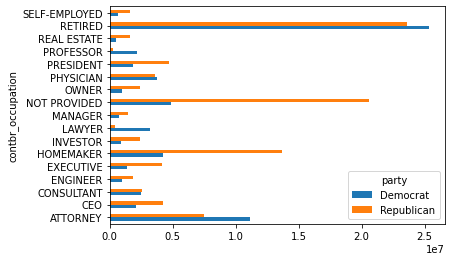

In [29]:
over_2mm.plot(kind='barh')

In [30]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

    Ardından mesleğe ve işverene göre toplayın.

In [31]:
grouped = fec_mrbo.groupby('cand_nm')

In [32]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [33]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

# Paketleme Bağış Miktarları
    Bu verileri analiz etmenin kullanışlı bir yolu, katkı paylarını katkı boyutuna göre bölümlere ayırmak için kesme işlevini kullanmaktır.

In [35]:
import numpy as np
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])

In [36]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [37]:
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

    Bağış boyutuna göre bir histogram elde etmek için Obama ve Romney verilerini ada ve çöp kutusu etiketine göre gruplayabiliriz.

In [39]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [40]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


    Bu veriler, Obama'nın Romney'den çok daha fazla sayıda küçük bağış aldığını gösteriyor. Ayrıca, adaya göre her boyuttaki toplam bağış yüzdesini görselleştirmek için katkı miktarlarını toplayabilir ve kovalar içinde normalleştirebilirsiniz.

In [41]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [42]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [43]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


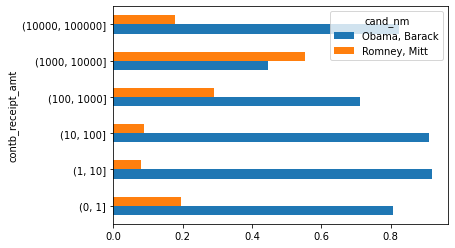

In [44]:
normed_sums[:-2].plot(kind='barh')

    Bu analiz birçok yönden iyileştirilebilir ve geliştirilebilir. Örneğin, bir veya daha fazla büyük bağış yerine çok sayıda küçük miktarlar veren bağışçıları ayarlamak için bağışçı adı ve posta koduna göre bağışları toplayabilirsiniz.

# Devlete Göre Bağış İstatistikleri
    Verilerin adaya ve devlete göre toplanması rutin bir meseledir.

In [45]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [46]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [48]:
totals = totals[totals.sum(1) > 100000]

In [49]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


    Her satırı toplam katkı miktarına bölerseniz, her aday için eyalete göre toplam bağışların göreli yüzdesini elde edersiniz.

In [50]:
percent = totals.div(totals.sum(1), axis=0)

In [51]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
